# Sparse Hebbian Learning: basics of coding

We are interested here in learning the "optimal" components of a set of images (let's say some "natural", usual images). As there is no supervisor to guide the learning, this is called unsupervised learning. Our basic hypothesis to find the best ("optimal") components will be to assume that *a priori* the most sparse is more plausible. We will implement the derived algorithm in this set of scripts.

Here, we will show the basic operations that are implemented in this package. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=4, suppress=True)

## experiments

To test and control for the role of different parameters, we will have a first object (in the [shl_experiments.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_experiments.py) script) that controls a learning experiment. It contains all relevant parameters, but can also keep a trace of the history of some statistics. This is useful to compare the relative efficiency of the different solutions.


In [3]:
tag = 'coding'
homeo_methods = ['None', 'HEH']
homeo_methods = ['None', 'HAP']
homeo_methods = ['None', 'HAP', 'HEH', 'Olshausen']

record_num_batches = 2**12

seed = 42
np.random.seed(seed)

In [4]:
from shl_scripts.shl_experiments import SHL
shl = SHL()
data = shl.get_data(matname=tag + '_test')
indx = np.random.permutation(data.shape[0])[:record_num_batches]

In [5]:
!ls -l {shl.data_cache}/{tag}*
!rm {shl.data_cache}/{tag}*lock*

-rw-r--r--  1 lolo  staff  169827968 May 16 10:24 data_cache/coding_test_data.npy
rm: data_cache/coding*lock*: No such file or directory


In [6]:
print('number of patches, size of patches = ', data.shape)
print('average of patches = ', data.mean(), ' +/- ', data.mean(axis=1).std())
SE = np.sqrt(np.mean(data**2, axis=1))
print('average energy of data = ', SE.mean(), '+/-', SE.std())

number of patches, size of patches =  (65520, 324)
average of patches =  8.184427416464041e-06  +/-  0.005576408526073966
average energy of data =  0.17406514625725478 +/- 0.06787452080620018


## learning

The actual learning is done in a second object (here ``dico``) from which we can access another set of properties and functions  (see the [shl_learn.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_learn.py) script):

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶None🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  1.7222560367317163e-05 +/- 0.00124144554106079
average energy of filters =  1.0 +/- 4.931176659116949e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  2.192591174165717e-05 +/- 0.0013090849134379777
average energy of filters =  1.0 +/- 4.3595874271640356e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
size of dictionary = (number of filters, size of imagelets) =  (441, 324)
average of filters =  -1.191802093540297e-05 +/- 0.001192069250547864
average energy of filters =  1.0 +/- 4.129104294410826e-17
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶

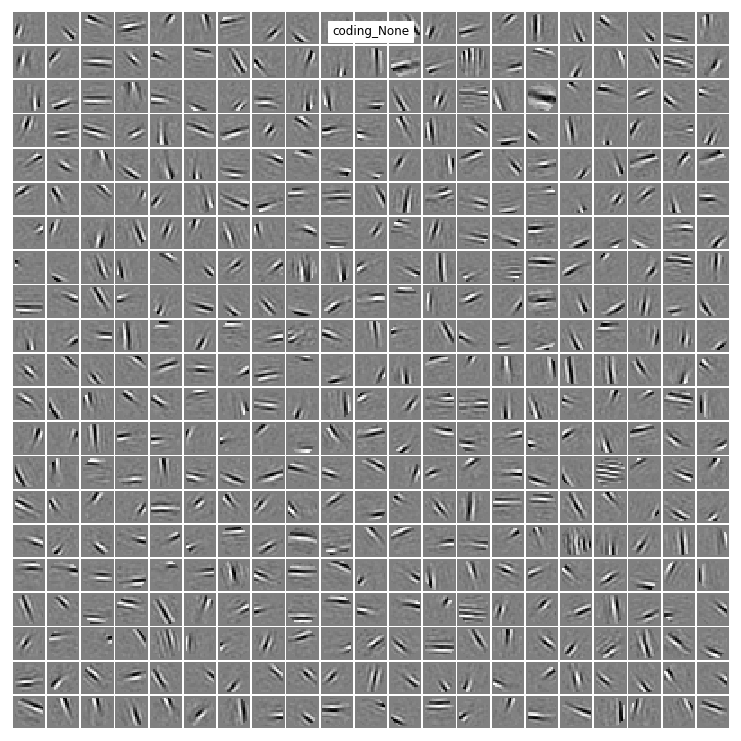

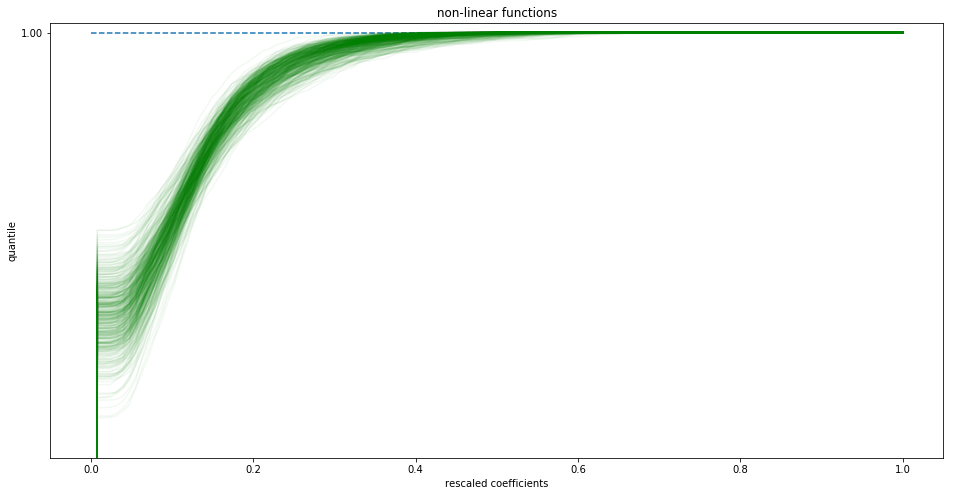

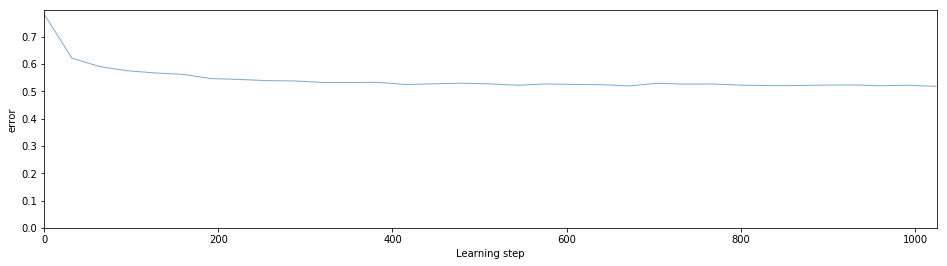

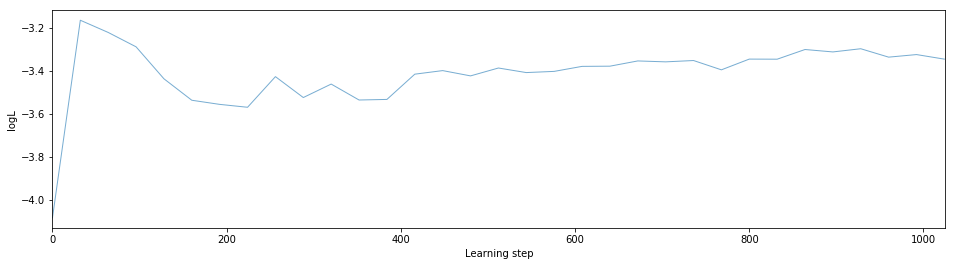

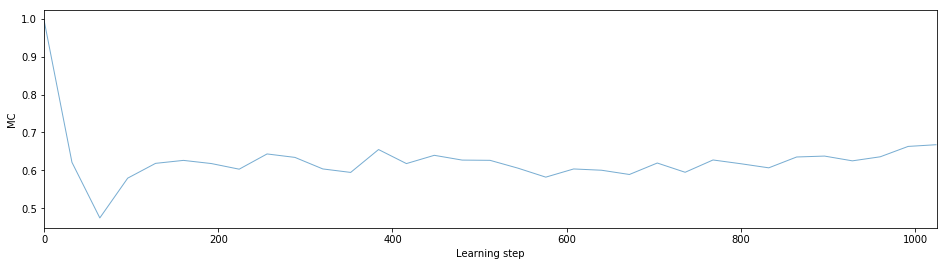

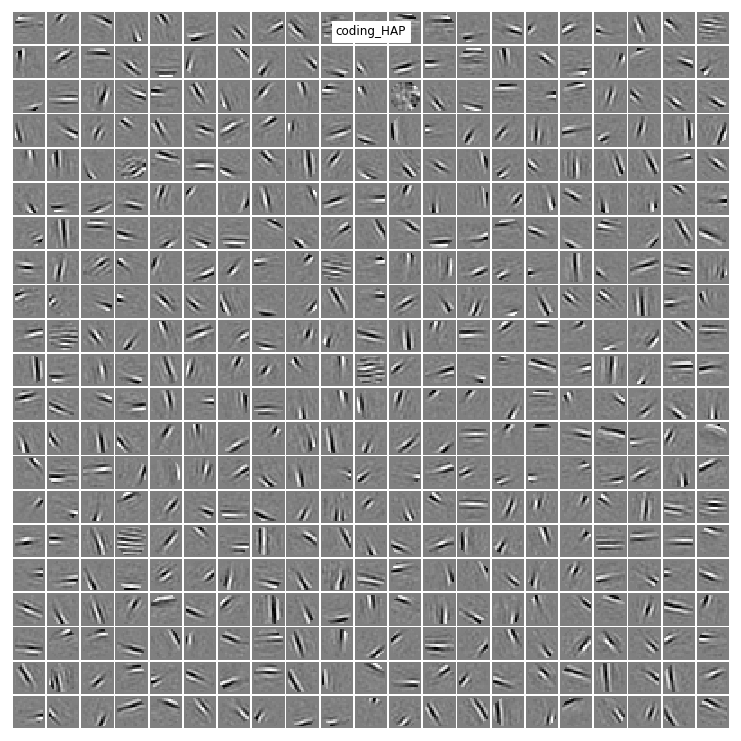

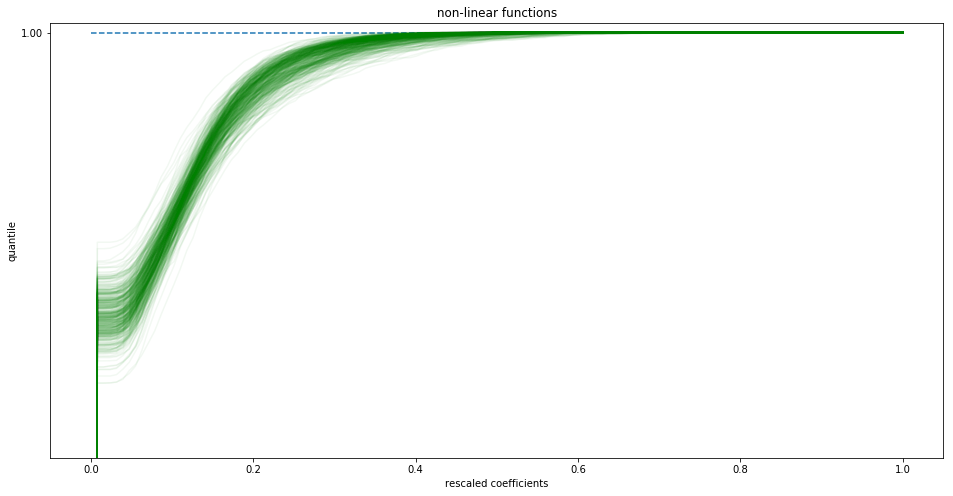

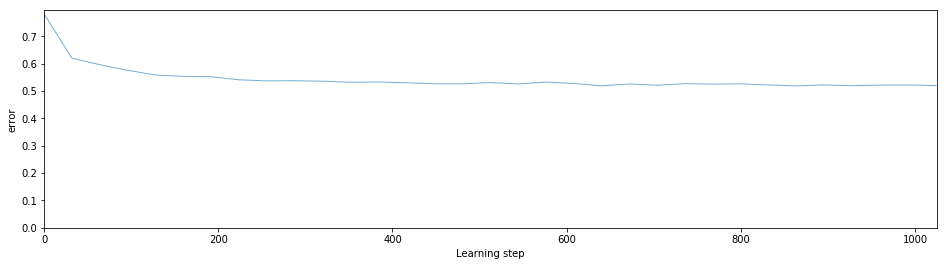

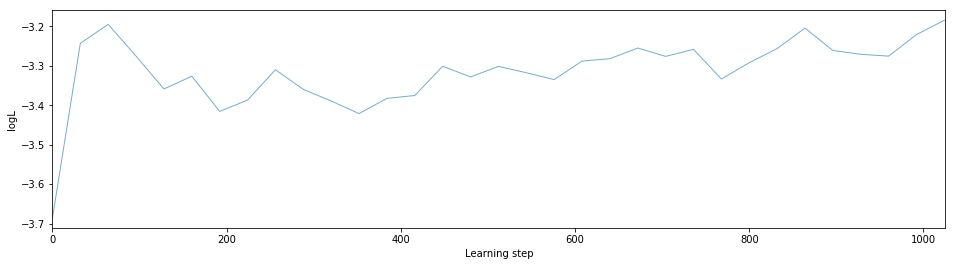

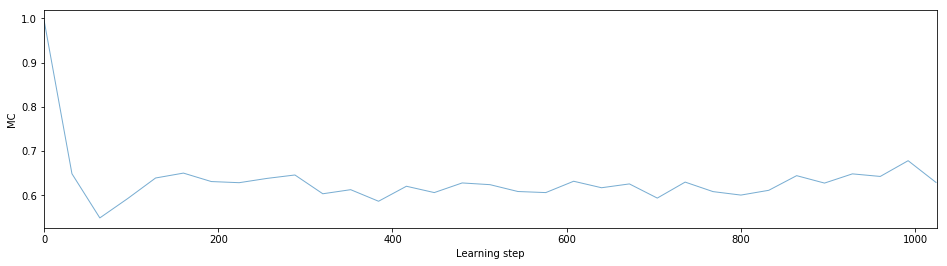

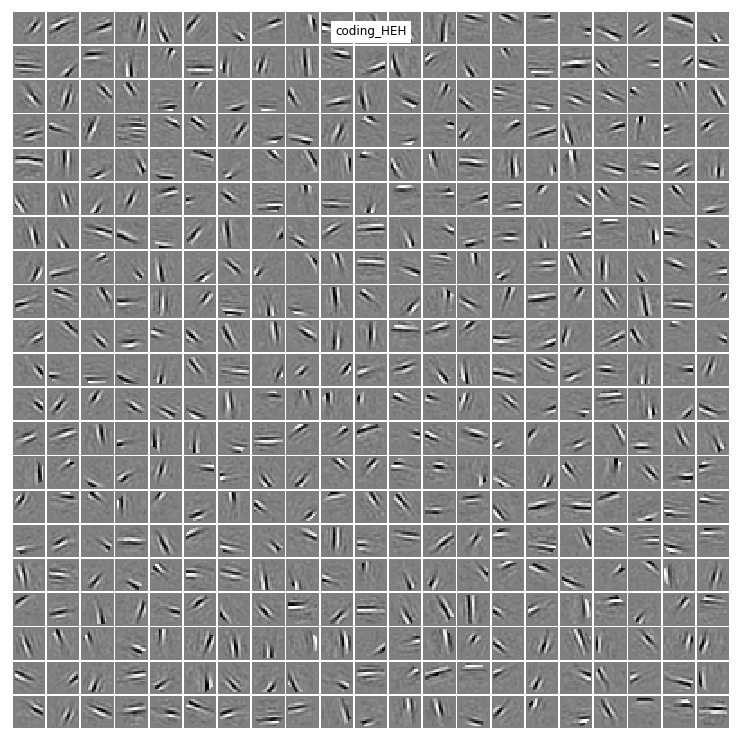

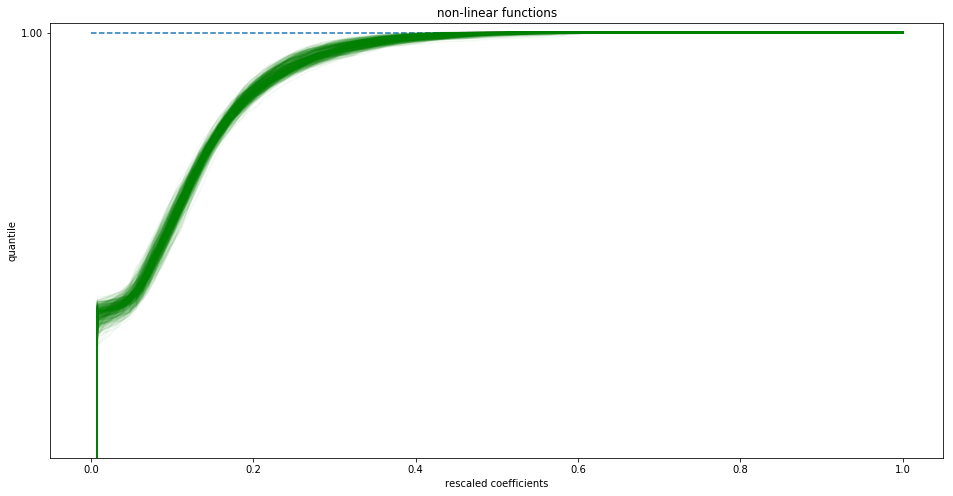

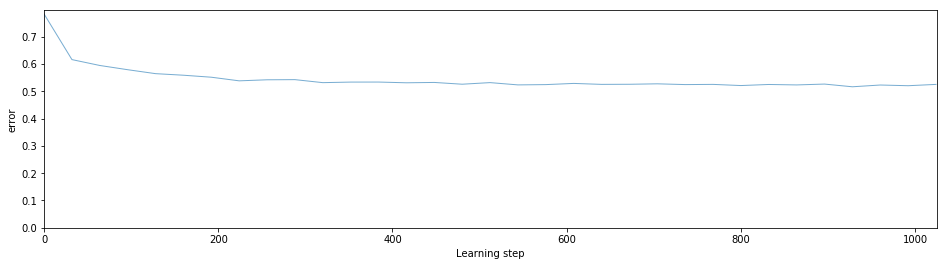

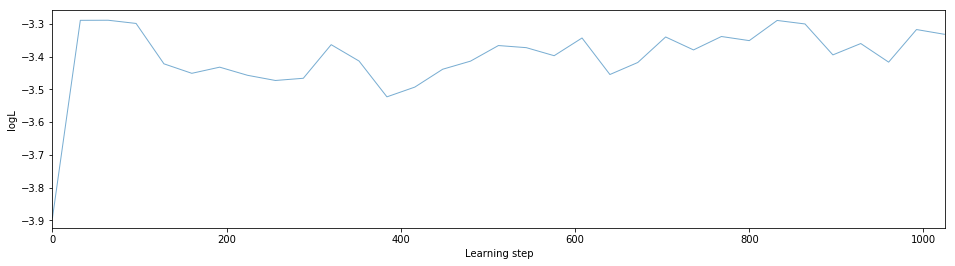

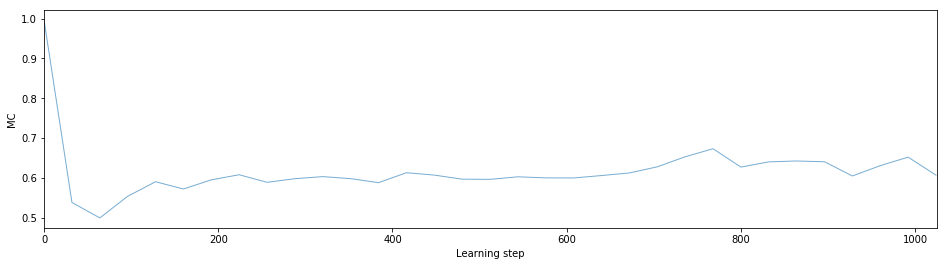

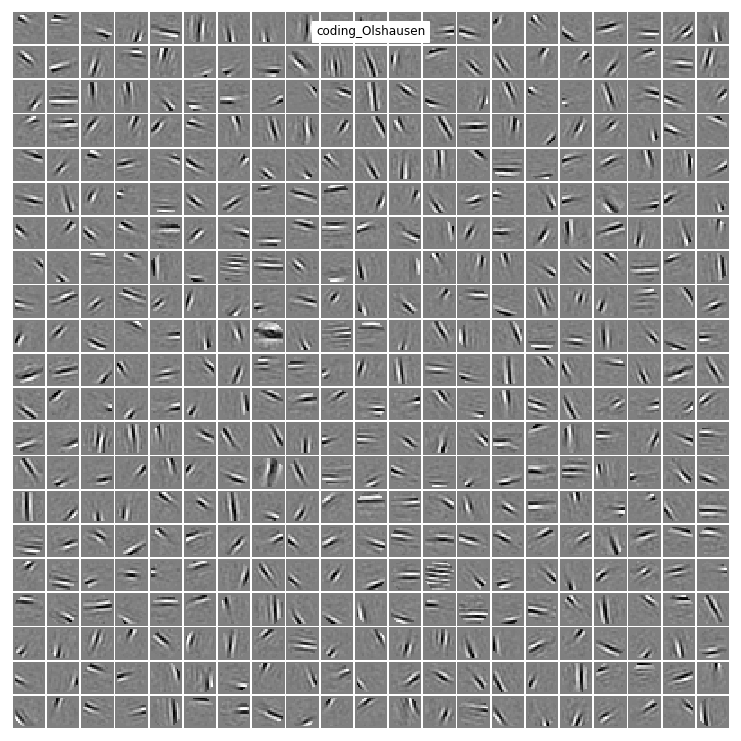

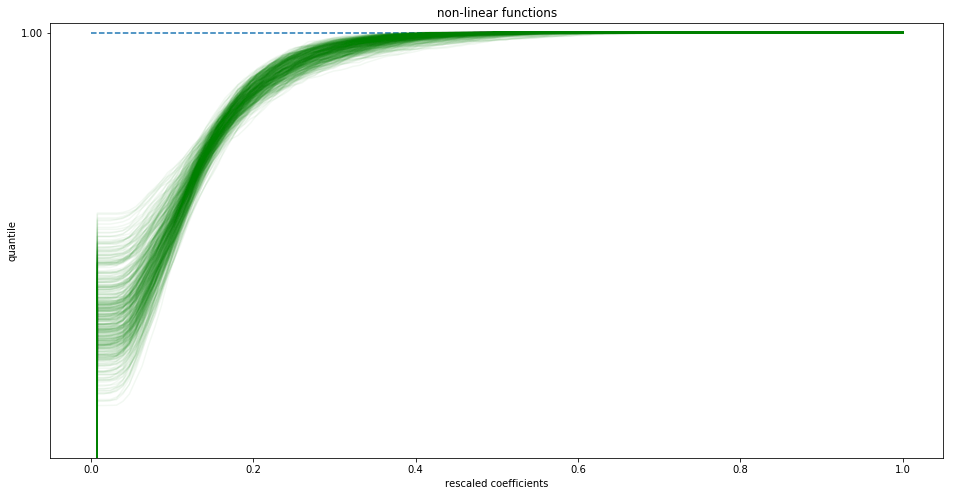

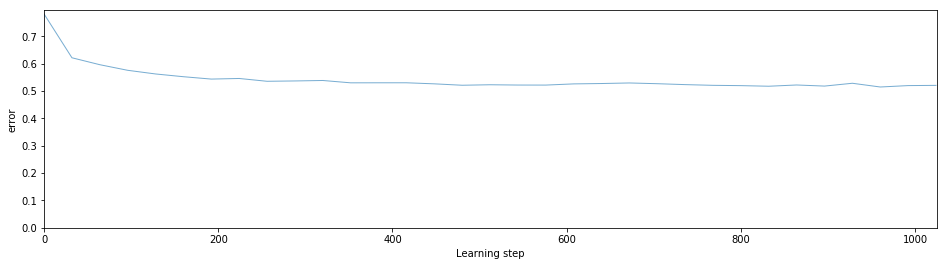

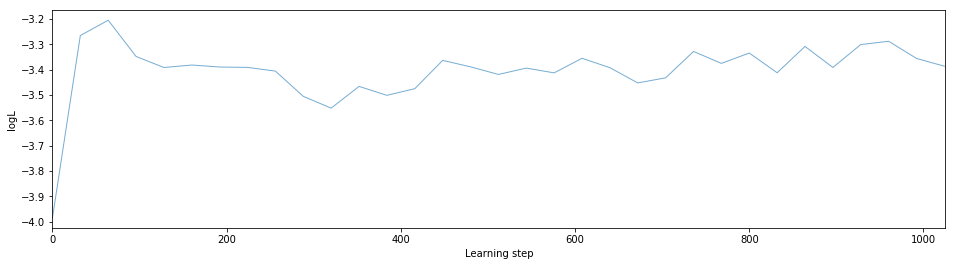

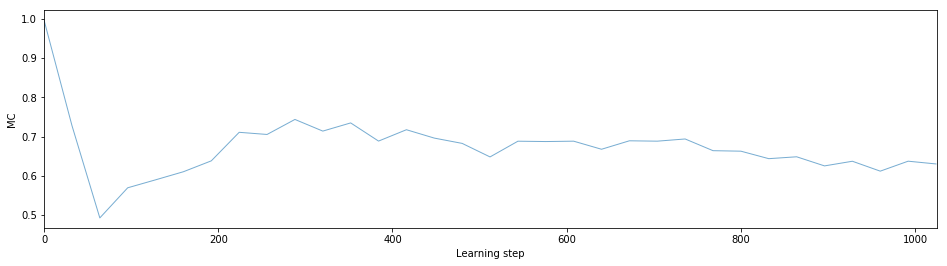

In [7]:
list_figures = ['show_dico', 'time_plot_error', 'time_plot_logL', 'time_plot_MC', 'show_Pcum']

dico = {}
for homeo_method in homeo_methods:
    print(42*'🐶')
    print(19*'🐶' + homeo_method + 10*'🐶')
    print(42*'🐶')
    shl = SHL(homeo_method=homeo_method)
    dico[homeo_method] = shl.learn_dico(data=data, list_figures=list_figures, matname=tag + '_' + homeo_method)

    print('size of dictionary = (number of filters, size of imagelets) = ', dico[homeo_method].dictionary.shape)
    print('average of filters = ',  dico[homeo_method].dictionary.mean(axis=1).mean(), 
          '+/-',  dico[homeo_method].dictionary.mean(axis=1).std())
    SE = np.sqrt(np.sum(dico[homeo_method].dictionary**2, axis=1))
    print('average energy of filters = ', SE.mean(), '+/-', SE.std())


## coding

The learning itself is done via a gradient descent but is highly dependent on the coding / decoding algorithm. This belongs to a another function (in the [shl_encode.py](https://github.com/bicv/SHL_scripts/blob/master/shl_scripts/shl_encode.py) script)

🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Non🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01972061668125698
average std of codewords =  0.13645885969466973
l0-sparseness of codewords =  0.02941147161989796
std of the average of individual patches =  0.0027610518742856804


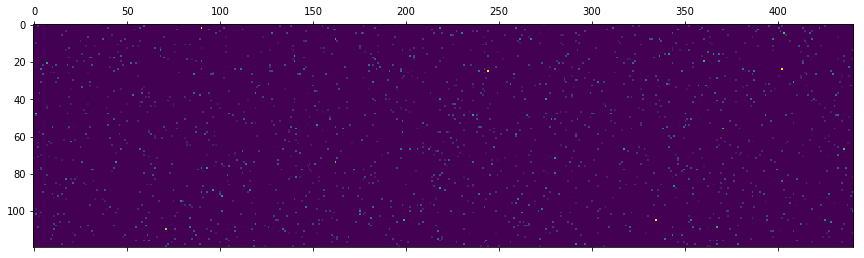

<Figure size 1080x216 with 0 Axes>

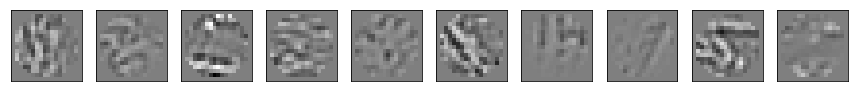

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

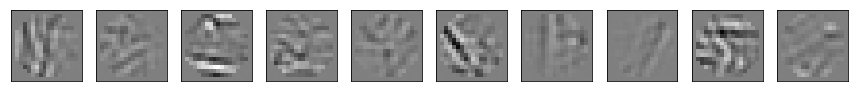

<Figure size 1080x216 with 0 Axes>

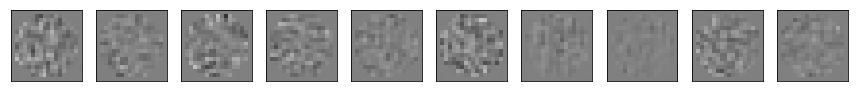

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -5.4767865508493156e-05 +/- 0.0044683799638801395
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -5.4767865508493156e-05 +/- 0.09789243422045639
average energy of residual =  0.0906362578462125 +/- 0.036986489976210894
median energy of residual =  0.08917372324247445
average gain of coding =  1.9923203384001944 +/- 0.42460475489145943
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01972061668125698
average std of codewords =  0.1364588596946697
l0-sparseness of codewords =  0.02941147161989796
std of the average of individual patches =  0.00276105187428568


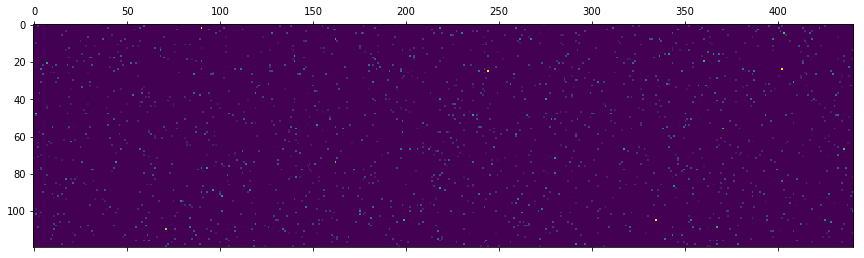

<Figure size 1080x216 with 0 Axes>

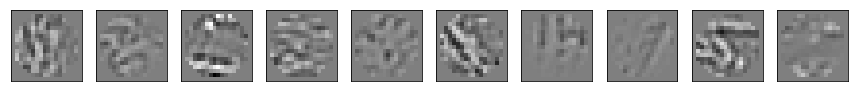

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

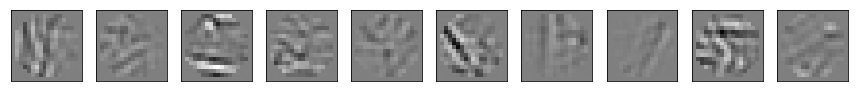

<Figure size 1080x216 with 0 Axes>

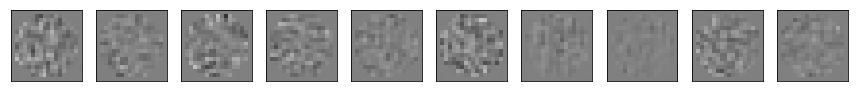

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -5.476786550849293e-05 +/- 0.0044683799638801395
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -5.476786550849293e-05 +/- 0.09789243422045639
average energy of residual =  0.09063625784621251 +/- 0.036986489976210894
median energy of residual =  0.08917372324247445
average gain of coding =  1.992320338400194 +/- 0.42460475489145943
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01765941990537598
average std of codewords =  0.13257147845201017
l0-sparseness of codewords =  0.028171392254818593
std of the average of individual patches =  0.008248076558711168


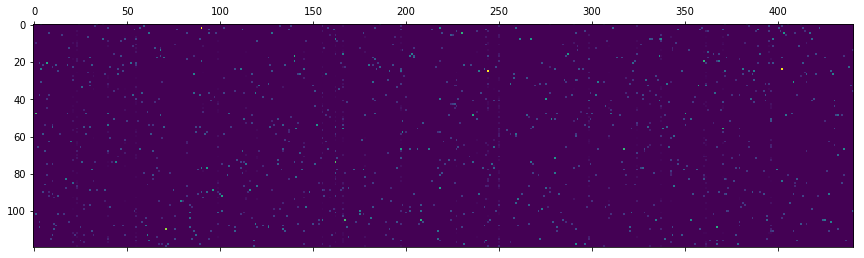

<Figure size 1080x216 with 0 Axes>

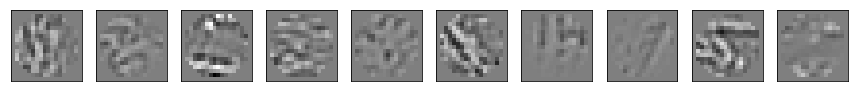

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

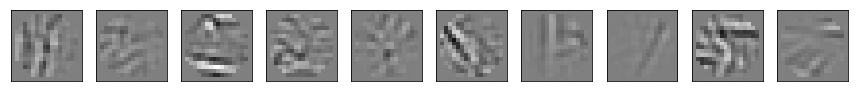

<Figure size 1080x216 with 0 Axes>

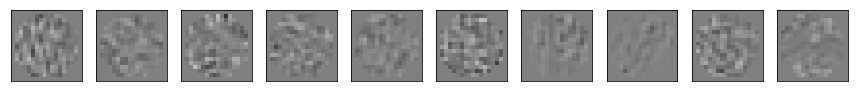

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -0.0003514249470752045 +/- 0.004700309856971235
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -0.0003514249470752045 +/- 0.1056099724466116
average energy of residual =  0.10048520421063746 +/- 0.03250097713014147
median energy of residual =  0.09889633571655225
average gain of coding =  1.7333802986137183 +/- 0.3529417771652244
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HAP🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01973043756235043
average std of codewords =  0.13660848006471493
l0-sparseness of codewords =  0.029421436543367346
std of the average of individual patches =  0.002769809226172123


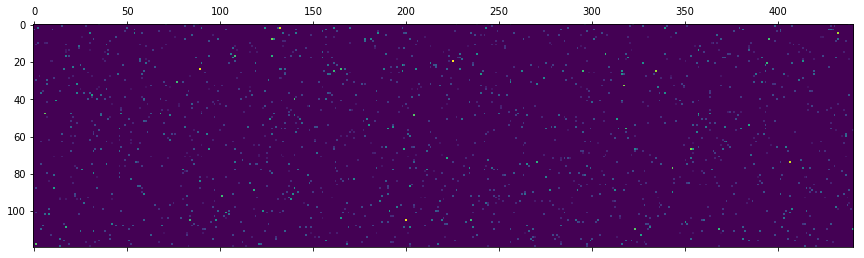

<Figure size 1080x216 with 0 Axes>

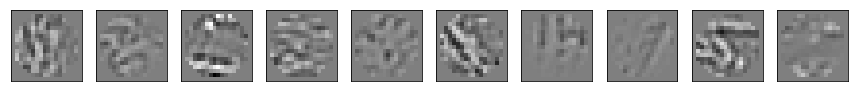

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

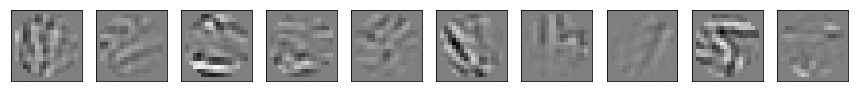

<Figure size 1080x216 with 0 Axes>

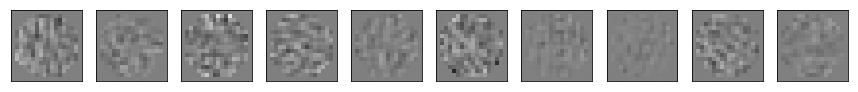

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -0.00016913072559062705 +/- 0.004439143177574441
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -0.00016913072559062705 +/- 0.09762867401477815
average energy of residual =  0.0904002646085964 +/- 0.036867041565358895
median energy of residual =  0.08876176527753102
average gain of coding =  1.9982563870705952 +/- 0.4331423148238716
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01973043756235043
average std of codewords =  0.13660848006471493
l0-sparseness of codewords =  0.029421436543367346
std of the average of individual patches =  0.002769809226172123


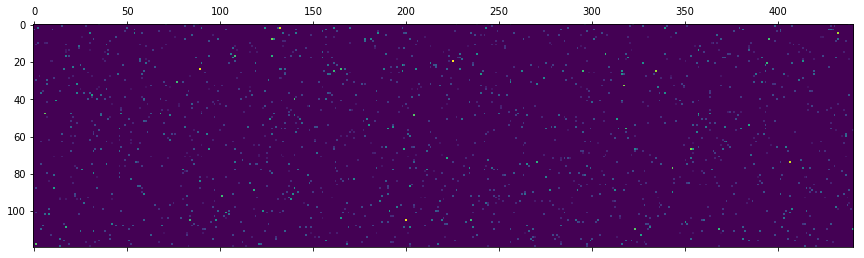

<Figure size 1080x216 with 0 Axes>

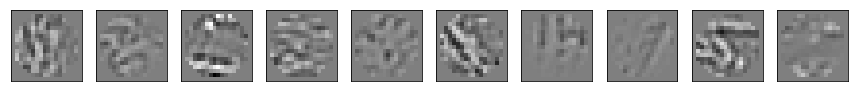

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

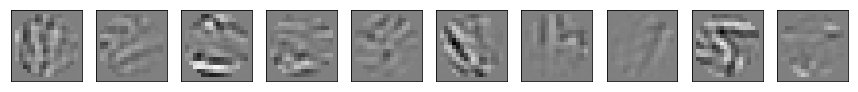

<Figure size 1080x216 with 0 Axes>

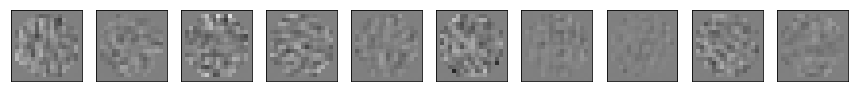

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -0.0001691307255906269 +/- 0.004439143177574441
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -0.0001691307255906269 +/- 0.09762867401477815
average energy of residual =  0.0904002646085964 +/- 0.036867041565358895
median energy of residual =  0.08876176527753102
average gain of coding =  1.9982563870705952 +/- 0.43314231482387167
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.018338380323106564
average std of codewords =  0.13397586458495633
l0-sparseness of codewords =  0.028188000460600906
std of the average of individual patches =  0.007674265064850946


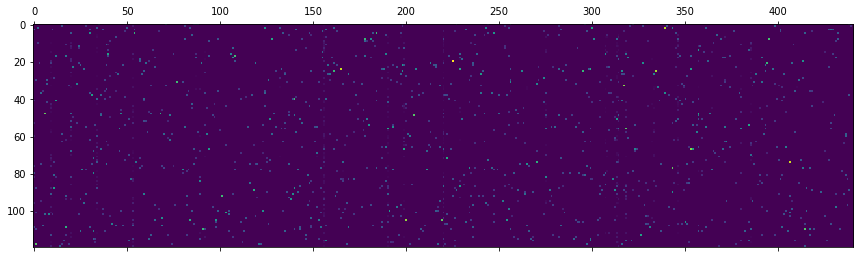

<Figure size 1080x216 with 0 Axes>

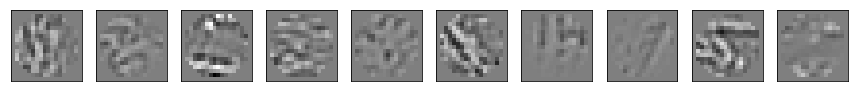

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

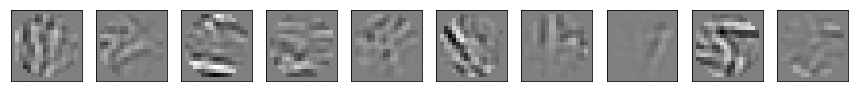

<Figure size 1080x216 with 0 Axes>

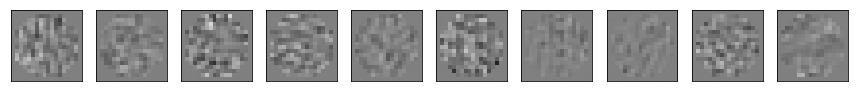

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -0.00011480589954936057 +/- 0.004600901684830878
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -0.00011480589954936057 +/- 0.10300604165954422
average energy of residual =  0.09745552496970825 +/- 0.03335683515624492
median energy of residual =  0.0941051066794299
average gain of coding =  1.7957143977650645 +/- 0.3603244145258419
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶HEH🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019667704038927362
average std of codewords =  0.13612075574057678
l0-sparseness of codewords =  0.029417561295351474
std of the average of individual patches =  0.0025317994060942567


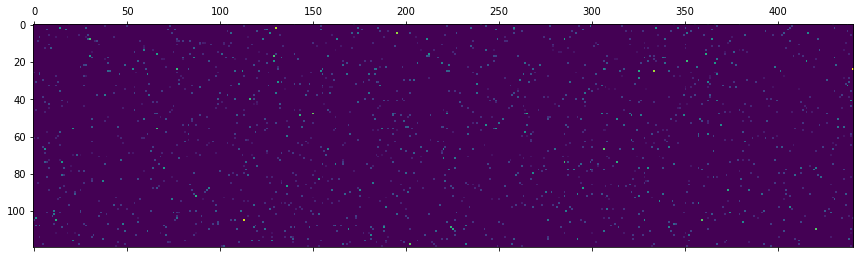

<Figure size 1080x216 with 0 Axes>

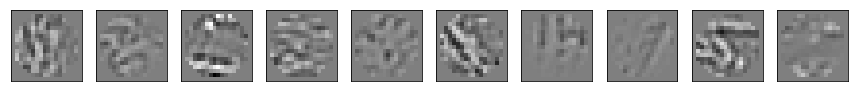

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

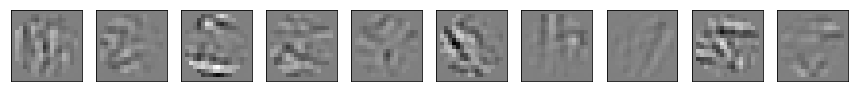

<Figure size 1080x216 with 0 Axes>

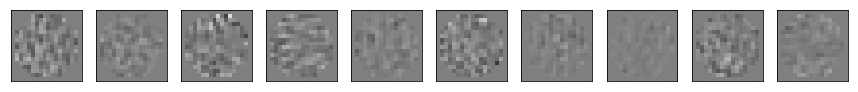

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  9.131206301635447e-05 +/- 0.004502982224929946
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  9.131206301635447e-05 +/- 0.09848294031495941
average energy of residual =  0.09109689749719016 +/- 0.037419956405094046
median energy of residual =  0.08910461633063498
average gain of coding =  1.9843067637915872 +/- 0.4260052953002408
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019667704038927362
average std of codewords =  0.13612075574057678
l0-sparseness of codewords =  0.029417561295351474
std of the average of individual patches =  0.0025317994060942567


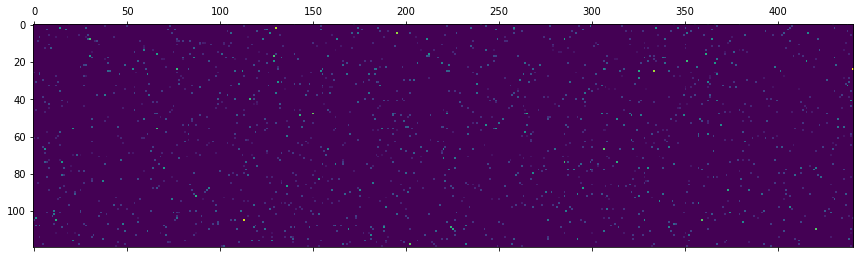

<Figure size 1080x216 with 0 Axes>

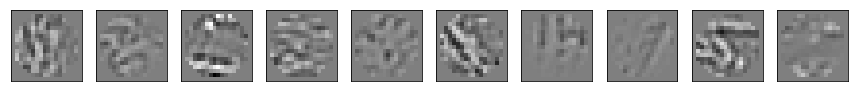

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

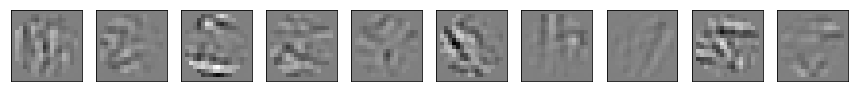

<Figure size 1080x216 with 0 Axes>

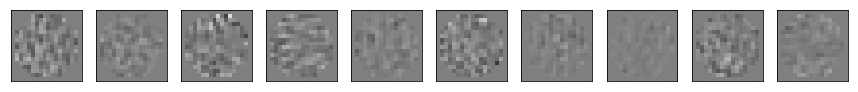

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  9.131206301635457e-05 +/- 0.004502982224929946
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  9.131206301635457e-05 +/- 0.09848294031495941
average energy of residual =  0.09109689749719016 +/- 0.037419956405094046
median energy of residual =  0.08910461633063496
average gain of coding =  1.9843067637915872 +/- 0.4260052953002408
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01940850723144905
average std of codewords =  0.13573596428241252
l0-sparseness of codewords =  0.02937604078089569
std of the average of individual patches =  0.002979825100779339


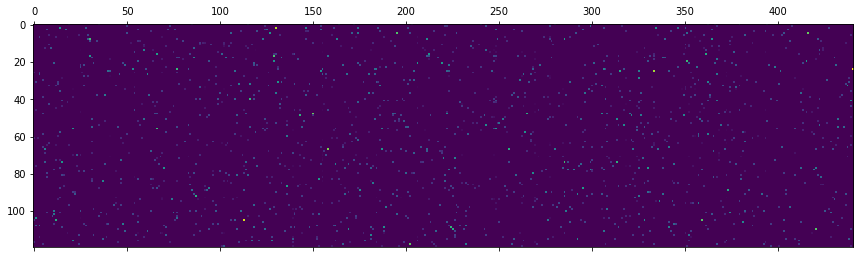

<Figure size 1080x216 with 0 Axes>

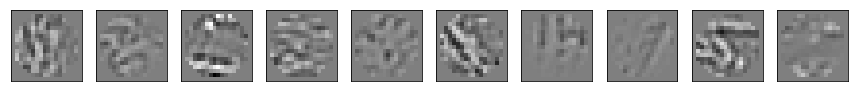

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

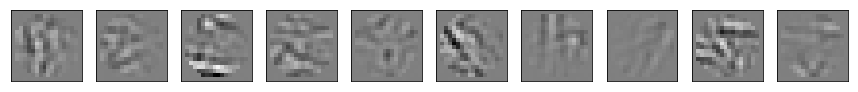

<Figure size 1080x216 with 0 Axes>

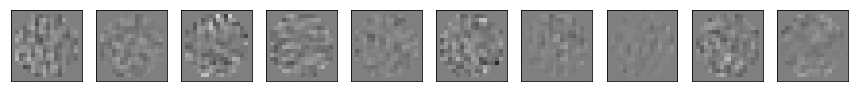

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  0.00010809418794710517 +/- 0.004553031158304808
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  0.00010809418794710517 +/- 0.0993465434825503
average energy of residual =  0.09250028076426414 +/- 0.03624148789462194
median energy of residual =  0.08984299012565794
average gain of coding =  1.9298902352646712 +/- 0.3936641312620129
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶Ols🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶🐶
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019697975871750296
average std of codewords =  0.1363873485775367
l0-sparseness of codewords =  0.029429187039399094
std of the average of individual patches =  0.0026143620215069554


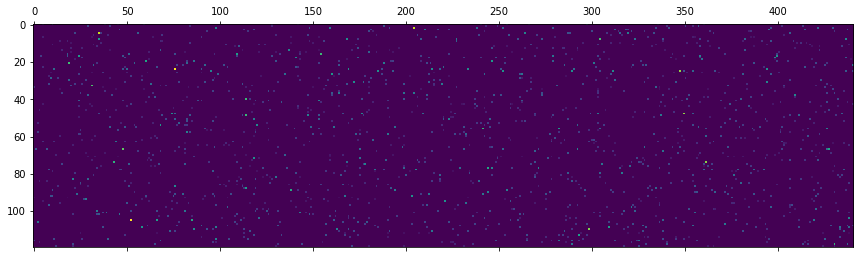

<Figure size 1080x216 with 0 Axes>

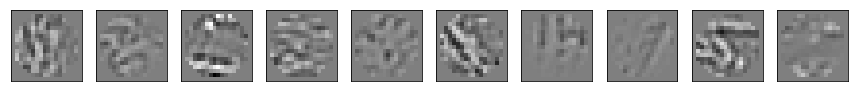

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

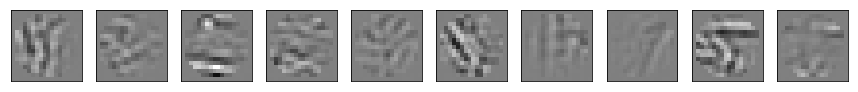

<Figure size 1080x216 with 0 Axes>

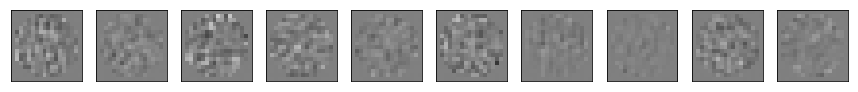

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -1.9133797693849246e-05 +/- 0.0044768399841785
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -1.9133797693849246e-05 +/- 0.0979495260218202
average energy of residual =  0.09070069907733075 +/- 0.03697963224377631
median energy of residual =  0.08888832684228111
average gain of coding =  1.9913248114763795 +/- 0.4283220196522897
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.019697975871750296
average std of codewords =  0.1363873485775367
l0-sparseness of codewords =  0.029429187039399094
std of the average of individual patches =  0.002614362021506955


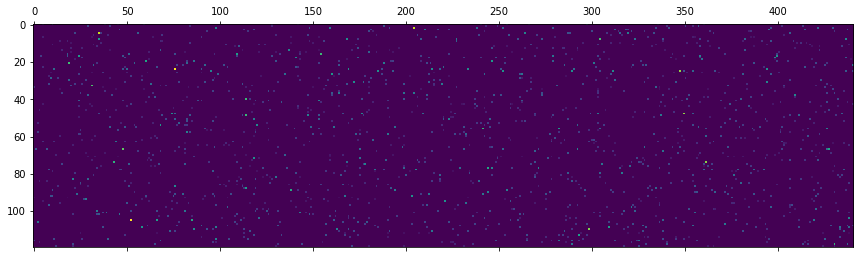

<Figure size 1080x216 with 0 Axes>

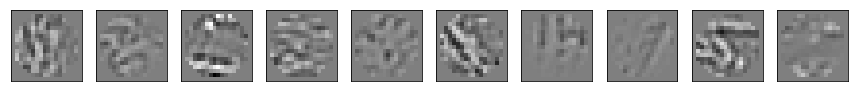

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

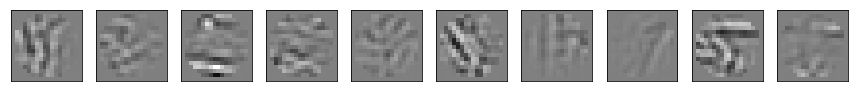

<Figure size 1080x216 with 0 Axes>

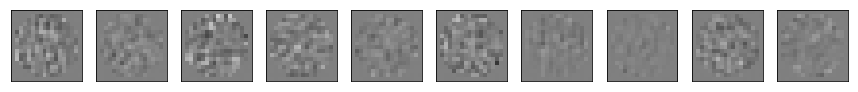

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -1.913379769384914e-05 +/- 0.0044768399841785
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -1.913379769384914e-05 +/- 0.0979495260218202
average energy of residual =  0.09070069907733075 +/- 0.03697963224377631
median energy of residual =  0.08888832684228111
average gain of coding =  1.9913248114763795 +/- 0.4283220196522897
🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒🐒
number of codes, size of codewords =  (4096, 441)
average of codewords =  0.01682547055807566
average std of codewords =  0.1313212266797458
l0-sparseness of codewords =  0.026653402246315194
std of the average of individual patches =  0.010122526843205836


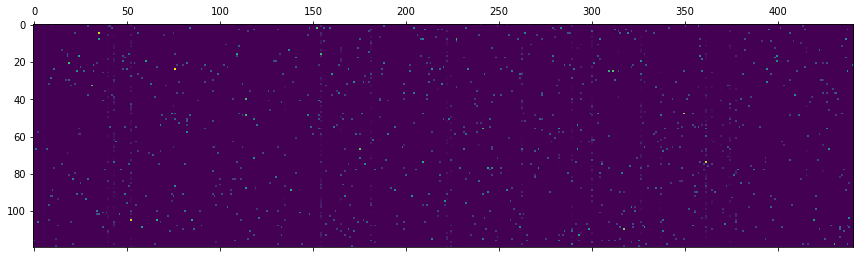

<Figure size 1080x216 with 0 Axes>

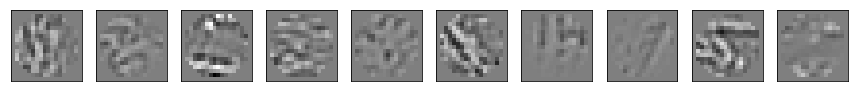

number of codes, size of reconstructed images =  (4096, 324)


<Figure size 1080x216 with 0 Axes>

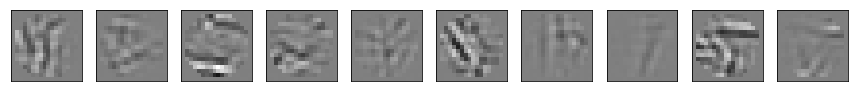

<Figure size 1080x216 with 0 Axes>

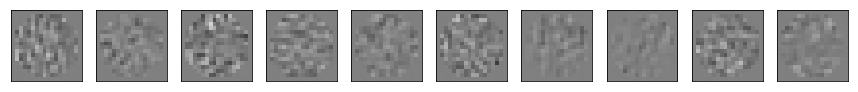

average of data patches =  8.516855332930217e-05 +/- 0.005493597218741383
average of residual patches =  -0.00019078243412920637 +/- 0.004744374688136516
median energy of data =  0.16977229077020428
average energy of data =  0.1753949709374869 +/- 0.06796358669765909
average error =  -0.00019078243412920637 +/- 0.1082344308059222
average energy of residual =  0.10358145293068999 +/- 0.03139444247930491
median energy of residual =  0.1027084856689543
average gain of coding =  1.6750602244680708 +/- 0.3543547508190988


In [8]:
np.random.seed(1973)
#sparse_code = shl.code(data, dico_, matname=matname)
P_cum_zeroeffect = np.linspace(0, 1, shl.nb_quant, endpoint=True)[np.newaxis, :] * np.ones((shl.n_dictionary, 1))
#P_cum = dico_.P_cum
#P_cum = None
#l0_sparseness = 150
l0_sparseness = shl.l0_sparseness


from shl_scripts.shl_tools import show_data, print_stats
coding_gain = {}
for homeo_method in homeo_methods:
    coding_gain[homeo_method] = {}
    print(42*'🐶')
    print(15*'🐶' + homeo_method[:3] + 15*'🐶')
    print(42*'🐶')

    from shl_scripts.shl_encode import mp
    labels = ['Non', 'One', 'Hom']
    for P_cum, gain, label in zip([None, P_cum_zeroeffect, dico[homeo_method].P_cum], [np.ones(shl.n_dictionary), None, None], labels):
        sparse_code = mp(data[indx, :], dico[homeo_method].dictionary, l0_sparseness=l0_sparseness, P_cum=P_cum, gain=gain)
        SD, SE = print_stats(data[indx, :], dico[homeo_method].dictionary, sparse_code)
        coding_gain[homeo_method][label] = (SD/SE).mean()


In [9]:
coding_gain

{'None': {'Non': 1.9923203384001944,
  'One': 1.992320338400194,
  'Hom': 1.7333802986137183},
 'HAP': {'Non': 1.9982563870705952,
  'One': 1.9982563870705952,
  'Hom': 1.7957143977650645},
 'HEH': {'Non': 1.9843067637915872,
  'One': 1.9843067637915872,
  'Hom': 1.9298902352646712},
 'Olshausen': {'Non': 1.9913248114763795,
  'One': 1.9913248114763795,
  'Hom': 1.6750602244680708}}

## Version used

In [10]:
%load_ext version_information
%version_information numpy, shl_scripts, scipy, matplotlib

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.0.0 (clang-900.0.39.2)]
IPython 6.3.1
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
scipy 1.1.0
matplotlib 2.2.2
Wed May 16 10:55:56 2018 CEST